# **Introduction**
In this tutorial, we are going to go through the materials we learned during the last week and run some codes to help with the comprehension of the contents. These are the topics that will be covered in the first tutorial:

* Gaussian Distributions
*   Bayes Rules
*   Naive Bayesian Classifier




# **Gaussian Distributions**

We will start with 1D gaussian distributions here. 
The formula for calculating Gaussian probability density function is:

$f(x) = \frac {1}{\sigma \sqrt{2\pi}}e^{-\frac{1}{2}(\frac{x-\mu}{\sigma})^2}$

where $\mu$ is the mean and $\sigma$ is the standard deviation (STD) of the distribution.

Lets first write some code to generate this function.
Then in the next Sections, we will be also generating 2D gaussian distributions to simulate classification dataset.

In [ ]:
# This function will be needed in calculating the Gaussian probability density function
def Gaussian1D(x, mean, STD):
  num = np.exp(-0.5*((x-mean)/STD)**2)
  den = np.sqrt(2*np.pi)*STD
  return(num/den)

# **Bayes Rules**


$P(\omega|X)*P(X) = P(X|\omega)*P(\omega)$

=>
$P(\omega|X) \propto P(X|\omega)*P(\omega)$


in which: 
* $P(X|\omega): Likelihood$
* $P(\omega): Prior$
* $P(\omega|X): Posterior$
* $P(X): evidence$

This means if we have the probability of each class (Prior), and the probability density function of evidence in that class (Likelihood), we can estimate that given a data, which class would have a higher probability for the data to belong (Posterior)?

P(W1) = 0.4
P(W2) = 0.6


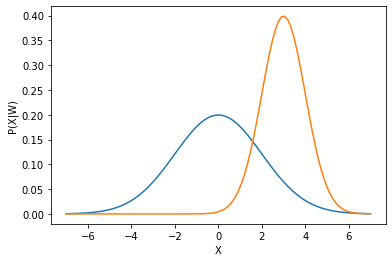

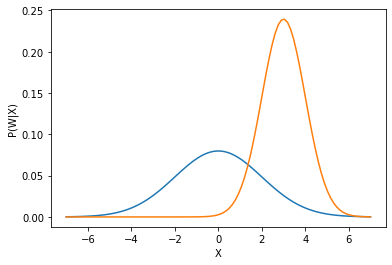

x =  [[2.08631914]]
P(W1|x) = [[0.04630676]]
P(W2|x) = [[0.1576827]]
Data belongs to the Class 0 (Orange)


In [ ]:
import numpy as np
import matplotlib.pyplot as plt
# Lets generate two classes:
y1 = np.ones((40,1))
y2 = np.zeros((60,1))
Y = np.vstack((y1, y2))
# Class probabilities(Prior):
P_1 = y1.shape[0]/Y.shape[0]
P_2 = y2.shape[0]/Y.shape[0]
print('P(W1) =',P_1)
print('P(W2) =', P_2)
# Lets Calculate the Gaussian probability density function having the mean and STD of two distributions

mean_1,STD_1 = 0, 2
mean_2,STD_2 = 3, 1
x = np.linspace(-7,7,100)

Pd_1 = Gaussian1D(x, mean_1, STD_1) 
Pd_2 = Gaussian1D(x, mean_2, STD_2)
plt.plot(x,Pd_1)
plt.plot(x,Pd_2)

plt.xlabel('X')
plt.ylabel('P(X|W)')
plt.show()
# Calculating the posteriors:
P1_d = Pd_1*P_1
P2_d = Pd_2*P_2

plt.figure()
plt.plot(x,P1_d)
plt.plot(x,P2_d)

plt.xlabel('X')
plt.ylabel('P(W|X)')

plt.show()

#Now, we should calculate the probability of new data belonging to each class using Bayes Rules:

# Building our classifier for a randorm input: 
from random import randrange
test = np.random.rand(1, 1)*3
print('x = ',test)
output_1 = Gaussian1D(test,mean_1,STD_1)*P_1
output_2 = Gaussian1D(test,mean_2,STD_2)*P_2
print('P(W1|x) =', output_1)
print('P(W2|x) =',output_2)

if output_1>output_2:
  print('Data belongs to the Class 1 (blue)')
else:
  print('Data belongs to the Class 0 (Orange)')



# **Naive Bayesian Classification**

Now, Lets generate 2D Gaussian distributions and then use them to train a Naive Bayesian Classifier:



(100, 2)


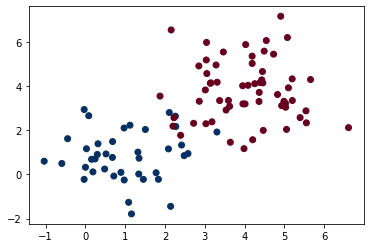

In [ ]:
# ND Gaussian:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import multivariate_normal
x, y = np.mgrid[-5:5:.01, -5:5:.01]
G1 = np.random.multivariate_normal([1, 1], [[1, 0], [0, 1.5]],40)
G2 = np.random.multivariate_normal([4, 4], [[1, 0], [0, 1.5]],60)
G = np.vstack((G1, G2))
print(np.shape(G))
y1 = np.ones((40,1))
y2 = np.zeros((60,1))
Y = np.vstack((y1, y2))
plt.scatter(G[:, 0], G[:, 1], c=Y, cmap='RdBu');

(100, 2)

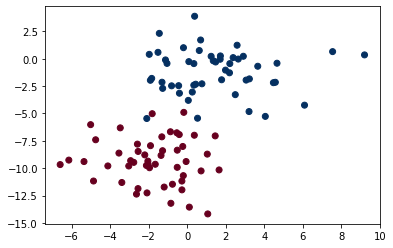

In [ ]:
# you can also use this function to make is easier! (Makes you a bit limited tho) 
from sklearn.datasets import make_blobs
X, y = make_blobs(100, 2, centers=2, random_state=2, cluster_std=2)
plt.scatter(X[:, 0], X[:, 1], c=y, cmap='RdBu');
np.shape(X)

OK, now that we have our classes, lets fit our Naive Bayesian Model:



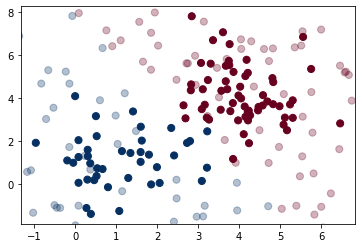

In [ ]:
from sklearn.naive_bayes import GaussianNB

Naivebayes_Model = GaussianNB()
y = np.ravel(Y);
Naivebayes_Model.fit(G, y);

# test data:

rng = np.random.RandomState(0)
Xnew = [-6, -14] + [20, 22] * rng.rand(500, 2)
ynew = Naivebayes_Model.predict(Xnew)

plt.scatter(G[:, 0], G[:, 1], c=y, s=50, cmap='RdBu')
lim = plt.axis()
plt.scatter(Xnew[:, 0], Xnew[:, 1], c=ynew, s=50, cmap='RdBu', alpha=0.3)
plt.axis(lim);

**Practice**

Try plotting the probability density function of a 2D gaussian distribution. It helps with understanding the concept better. 

Please share your ideas and thoughts on Piazza and ask me your questions.

**References and Relevant websites**

[machinelearningmastery](https://machinelearningmastery.com/classification-as-conditional-probability-and-the-naive-bayes-algorithm/)

[In Depth: Naive Bayes Classification](https://jakevdp.github.io/PythonDataScienceHandbook/05.05-naive-bayes.html#Multinomial-Naive-Bayes)


